In [27]:
import keras as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D, MaxPooling2D, Dropout
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [28]:
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [29]:
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [30]:
print(x_train.shape) #(50000 images, 32pixl, 32pixl, 3 RGB colors)
print(y_train.shape) #(50000 rows, 1 label)

print(x_test.shape) #(50000 images, 32pixl, 32pixl, 3 RGB colors)
print(y_test.shape) #(50000 rows, 1 label)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


image label is: [4]


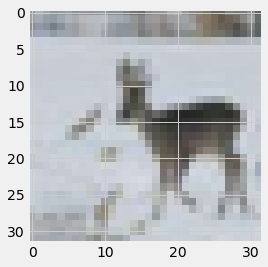

In [31]:
index = 20
img = plt.imshow(x_train[20])
print('image label is:',y_train[20])

In [32]:
classification = ['airplane','autombile','bird','cat','deer','dog','frog','horse','ship','truck']
print(classification[y_train[20][0]])

deer


In [33]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


print(y_train_one_hot.shape)
print(y_test_one_hot.shape)


(50000, 10)
(10000, 10)


In [34]:
x_train = x_train/255
x_test = x_test/255

In [35]:
print(x_train.shape) #(50000 images, 32pixl, 32pixl, 3 RGB colors)
print(x_test.shape) #(50000 rows, 1 label)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [36]:
x_train[index]

array([[[0.6       , 0.61568627, 0.60784314],
        [0.68235294, 0.70588235, 0.7372549 ],
        [0.60784314, 0.64705882, 0.6745098 ],
        ...,
        [0.47843137, 0.49019608, 0.48235294],
        [0.54117647, 0.56078431, 0.55294118],
        [0.38039216, 0.39607843, 0.38039216]],

       [[0.62745098, 0.63921569, 0.64705882],
        [0.64313725, 0.66666667, 0.70588235],
        [0.58823529, 0.62352941, 0.6627451 ],
        ...,
        [0.5372549 , 0.52941176, 0.50588235],
        [0.62745098, 0.63137255, 0.61568627],
        [0.40392157, 0.42745098, 0.41960784]],

       [[0.54901961, 0.56078431, 0.57647059],
        [0.57647059, 0.59607843, 0.65098039],
        [0.53333333, 0.56862745, 0.61960784],
        ...,
        [0.40784314, 0.40392157, 0.38823529],
        [0.49019608, 0.50196078, 0.49019608],
        [0.36470588, 0.4       , 0.39607843]],

       ...,

       [[0.68627451, 0.69411765, 0.70196078],
        [0.66666667, 0.6745098 , 0.68235294],
        [0.66666667, 0

In [37]:
#create the model 

model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax')) #becouse we have 10 catigories 


In [38]:
model.compile(loss ='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
#train the model 

hist = model.fit(x_train, 
                 y_train_one_hot,
                 batch_size=256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 10s 62ms/step - loss: 0.7082 - accuracy: 0.7495 - val_loss: 1.0321 - val_accuracy: 0.6613
Epoch 2/10
157/157 [==============================] - 11s 70ms/step - loss: 0.6721 - accuracy: 0.7628 - val_loss: 1.0198 - val_accuracy: 0.6638
Epoch 3/10
157/157 [==============================] - 11s 71ms/step - loss: 0.6301 - accuracy: 0.7769 - val_loss: 0.9928 - val_accuracy: 0.6750
Epoch 4/10
157/157 [==============================] - 11s 72ms/step - loss: 0.5916 - accuracy: 0.7906 - val_loss: 1.0353 - val_accuracy: 0.6665
Epoch 5/10
157/157 [==============================] - 11s 73ms/step - loss: 0.5584 - accuracy: 0.8010 - val_loss: 1.0337 - val_accuracy: 0.6700
Epoch 6/10
157/157 [==============================] - 11s 72ms/step - loss: 0.5334 - accuracy: 0.8110 - val_loss: 1.0462 - val_accuracy: 0.6648
Epoch 7/10
157/157 [==============================] - 11s 70ms/step - loss: 0.4961 - accuracy: 0.8228 - val_loss: 1.0815 - val_accuracy:

In [43]:
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 2s 6ms/step - loss: 1.1321 - accuracy: 0.6598


0.6597999930381775

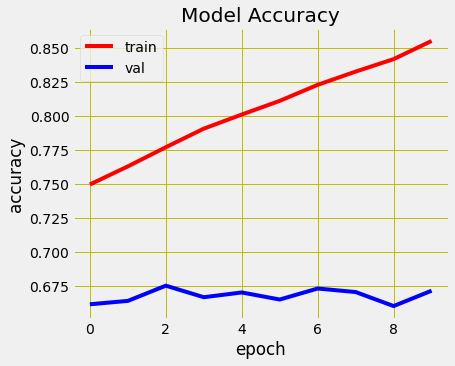

In [53]:

plt.figure(figsize=(6, 5))
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y')
plt.show()

In [21]:
#model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
